#### 파이썬에서 엑셀 데이터 불러오기
- nationalsinglehousehold.xlsx 파일 저장 후 저장위치 지정하여 불러오기
- nationalsinglehousehold는 1. 1인가구 현황(2000~)에 관련 자료임
- 컬럼 설명) year:년도, per_single_house:1인가구 비율, num_single_house: 1인가구 수
- 시계열 그래프에 사용될 예정

In [1]:
import pandas as pd 
df = pd.read_excel('nationalsinglehousehold.xlsx')

df.head()

,year,per_single_house,num_single_house
0,2000,15.5,2224433
1,2005,20.0,3170675
2,2010,23.9,4142165
3,2015,27.2,5203440
4,2016,27.9,5397615


#### 시계열 그래프 그리기 

In [2]:
# 혹시 모를 경우 대비
# 그래프에서 한글 표기를 위한 글자체 변경(윈도우, 맥os 각각의 경우에 대해서 처리)

from matplotlib import font_manager, rc
import platform 

if platform.system() == 'Windows': 
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else: 
    print('Check your OS system')


In [3]:
# 시각화를 위한 matplotlib 라이브러리 불러오기
import matplotlib.pyplot as plt

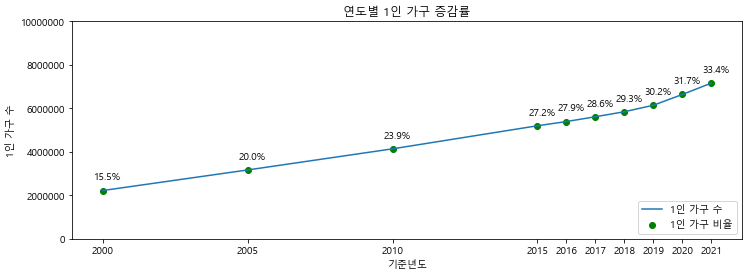

In [4]:
# 시계열 그래프 꾸미기

## 그래프 크기 조절
plt.figure(figsize = (12,4))

## 그래프 내용 설정 , label이름 설정
plt.plot(df['year'], df['num_single_house'], label = '1인 가구 수')
plt.scatter(df['year'], df['num_single_house'], c='g', label = '1인 가구 비율')

## 범례(legend) 설정 : '1인 가구 수'와 '1인 가구 비율' 오른쪽 아래 범례
plt.legend(fontsize = 10, loc = 4)

## 그래프 타이틀, x축, y축 이름 달기
plt.title('연도별 1인 가구 증감률')
plt.xlabel('기준년도')
plt.ylabel('1인 가구 수')

## 그래프 x축 값과 y축 값 설정 
values = ['2000','2005','2010','2015','2016','2017','2018','2019','2020','2021']
plt.xticks(df['year'].values)

plt.ylim(0 , 10000000)
plt.ticklabel_format(axis='y',useOffset=False, style='plain')

## plt 선 그래프에 scatter 값 표시하기
for i in range(len(df)):
    row  = df.iloc[i]
    name = str(row['per_single_house'])
    x = row['year']
    y = row['num_single_house']
    
    plt.text(x - 0.3, y + 500000, name+'%', fontsize = 10)


# plt.show()
plt.savefig('project_01_ppt_01.png', dpi = 100)